<a href="https://colab.research.google.com/github/y93r/Let-s-Code-Santander/blob/main/Aula_04_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'https://api.covid19api.com/dayone/country/brazil'
resposta = requests.get(url)
if resposta.status_code == 200:
    print(f'{resposta.status_code} = Sucesso!')
else:
    print('Not Found!')

200 = Sucesso!


In [2]:
# Retorna todos os dados da API:
dados_json = resposta.json()
print(dados_json[0])

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903', 'Country': 'Brazil', 'CountryCode': 'BR', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '-14.24', 'Lon': '-51.93', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-02-26T00:00:00Z'}


In [3]:
dados_json[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [4]:
# Criar uma variavel para filtrar essas informações:
dados_filtrados = []

# Fazer um for para cada informação encontrada em dados_jason: vou adicionar em dados_filtrados:
for informacoes in dados_json:
    dados_filtrados.append([informacoes['Confirmed'], informacoes['Deaths'], informacoes['Recovered'], informacoes['Active'], informacoes['Date']])

In [5]:
# Colocando o cabeçalho :
dados_filtrados.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])

In [6]:
#Confirmar se deu certo a solitação vendo os primeiros itens da tabela
dados_filtrados[0:11]

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z']]

In [7]:
confirmado = 0
obitos = 1
recuperados = 2
ativos = 3
data = 4

In [8]:
# Excluindo o time zone que é 0 e não agrega em nada no projeto:
for linhas in range(1, len(dados_filtrados)):
    dados_filtrados[linhas][data] = dados_filtrados[linhas][data][:10]

In [9]:
# Colocando as informações abaixo do cabeçalho cada um referente a sua informação:
print(dados_filtrados[0])
for i in dados_filtrados[1:]:
    print(i)

['confirmados', 'obitos', 'recuperados', 'ativos', 'data']
[1, 0, 0, 1, '2020-02-26']
[1, 0, 0, 1, '2020-02-27']
[1, 0, 0, 1, '2020-02-28']
[2, 0, 0, 2, '2020-02-29']
[2, 0, 0, 2, '2020-03-01']
[2, 0, 0, 2, '2020-03-02']
[2, 0, 0, 2, '2020-03-03']
[4, 0, 0, 4, '2020-03-04']
[4, 0, 0, 4, '2020-03-05']
[13, 0, 0, 13, '2020-03-06']
[13, 0, 0, 13, '2020-03-07']
[20, 0, 0, 20, '2020-03-08']
[25, 0, 0, 25, '2020-03-09']
[31, 0, 0, 31, '2020-03-10']
[38, 0, 0, 38, '2020-03-11']
[52, 0, 0, 52, '2020-03-12']
[151, 0, 0, 151, '2020-03-13']
[151, 0, 0, 151, '2020-03-14']
[162, 0, 0, 162, '2020-03-15']
[200, 0, 1, 199, '2020-03-16']
[321, 1, 2, 318, '2020-03-17']
[372, 3, 2, 367, '2020-03-18']
[621, 6, 2, 613, '2020-03-19']
[793, 11, 2, 780, '2020-03-20']
[1021, 15, 2, 1004, '2020-03-21']
[1546, 25, 2, 1519, '2020-03-22']
[1924, 34, 2, 1888, '2020-03-23']
[2247, 46, 2, 2199, '2020-03-24']
[2554, 59, 2, 2493, '2020-03-25']
[2985, 77, 6, 2902, '2020-03-26']
[3417, 92, 6, 3319, '2020-03-27']
[3904, 1

In [10]:
# Transformando os dados da minha API em csv:
import csv
import datetime as dt
with open('brasil_covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(dados_filtrados)

# Altertando a data dos dados que é string para datetime:
for i in range(1, len(dados_filtrados)):
    dados_filtrados[i][data] = dt.datetime.strptime(dados_filtrados[i][data], '%Y-%m-%d')

In [11]:
# Colocando as informações abaixo do cabeçalho cada um referente a sua informação:
print(dados_filtrados[0])
for i in dados_filtrados[1:]:
    print(i)

['confirmados', 'obitos', 'recuperados', 'ativos', 'data']
[1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)]
[1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)]
[1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)]
[2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)]
[2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)]
[2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)]
[2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)]
[4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)]
[4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)]
[13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)]
[13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)]
[20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)]
[25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)]
[31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)]
[38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)]
[52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)]
[151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)]
[151, 0, 0, 151, datetime.datetime(2020, 3, 14, 0, 0)]
[162, 0, 0

In [12]:
# Criando uma função para construir os dados do eixo y:
def get_datasets(y, labels):
    # Condição para verificar se o primeiro valor que foi passado em y é um tipo lista ou um valor comum:
    if type(y[0]) == list:
        # se for uma lista eu vou inicializar uma variavel: que vai ser uma lista contendo os valores de 'y' e o 'label' respectivo de cada um delas.
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [13]:
# Função para definir o titulo do gráfico:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [14]:
# Função que cria o gráfico: que recebe todos os dicionarios:
def create_chart(x, y, labels, kind='bar', title=''):
    # Criar uma cariavel que recebe uma função
    datasets = get_datasets(y, labels)

    # Variavel Chave responsavel pela denifição do titulo e outras coisas referente essa API:
    options = set_title(title)

    # Criar o dicionario que representa o gráfico:
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [15]:
# Função para fazer a requisição na API: retorno é binário
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    requisicao = requests.get(f'{url_base}?c={str(chart)}')
    return requisicao.content

In [16]:
# Função para salvar a imagem:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [17]:
from PIL import Image
from IPython.display import display

In [18]:
# Função para mostrar a imagem
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

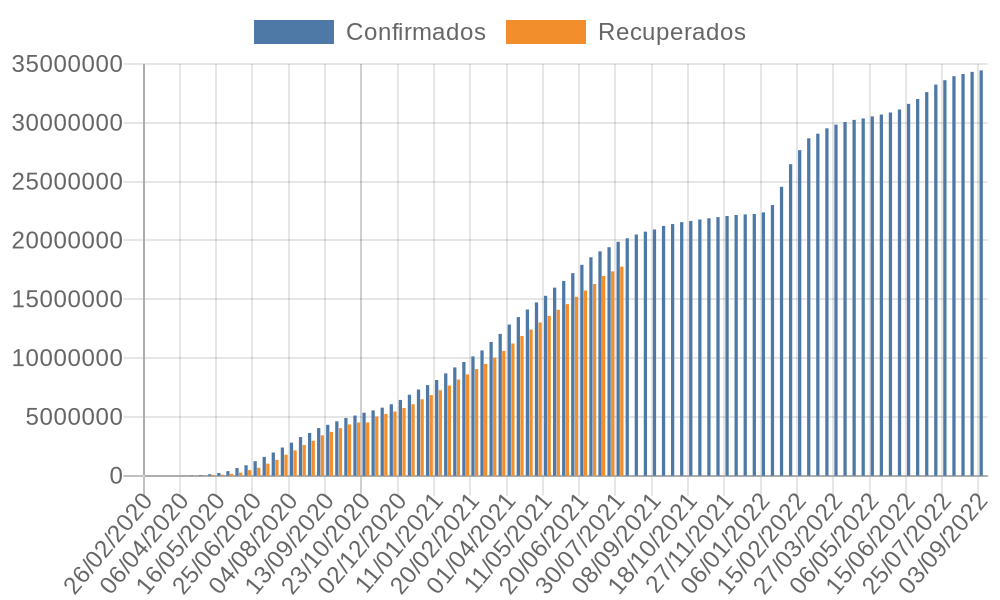

In [19]:
y_data_1 = []
for obs in dados_filtrados[1::10]:
    y_data_1.append(obs[confirmado])

y_data_2 = []
for obs in dados_filtrados[1::10]:
    y_data_2.append(obs[recuperados])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in dados_filtrados[1::10]:
    x.append(obs[data].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmado x recuperados')
chart_content = get_api_chart(chart)
save_image('grafico-confirmado-recuperado.png', chart_content)
display_image('grafico-confirmado-recuperado.png')

In [20]:
from urllib.parse import quote

# Gerar QR-CODE:
def get_api_qrcode(link):
    text = quote(link) # parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = requests.get(f'{url_base}?text={text}')
    return resp.content

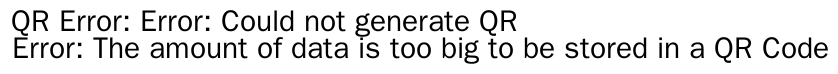

In [21]:
# Recuperar o link
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')